<a href="https://colab.research.google.com/github/R0ckie/prelim/blob/main/LinAlg_prelims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[180 220]


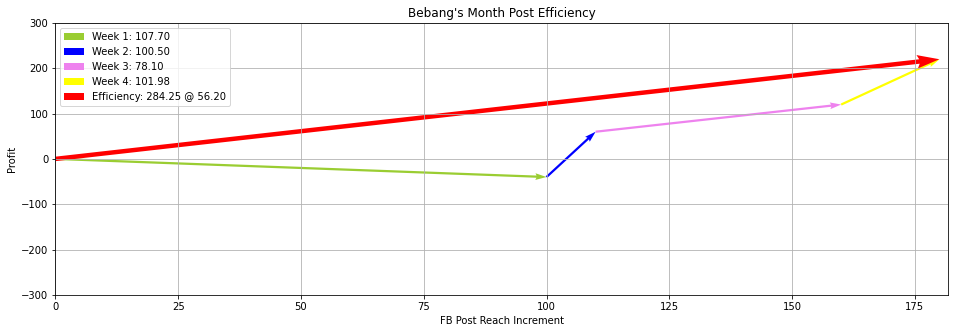

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def month_profit_trace(profit, reach, make_figs=True):
    if (profit.shape == (4,)) and (reach.shape == (4,)):
        e_week1 = np.array([reach[0], profit[0]])
        e_week2 = np.array([reach[1], profit[1]])
        e_week3 = np.array([reach[2], profit[2]])
        e_week4 = np.array([reach[3], profit[3]])

        e_month = (e_week1 + e_week2 + e_week3 + e_week4)
        e_month_magnitude = np.linalg.norm (e_month)
        e_monthx = np.square(e_month[0])
        e_monthy = np.square(e_month[1])

        print(e_month)
        alpha = 0.1
        theta = np.arctan((e_monthy/(e_monthx-alpha)))
        theta = np.degrees(theta)

        plt.figure(figsize=(16, 5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0, 1.01 * np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)), np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()

        plt.quiver(0, 0, e_week1[0], e_week1[1],
                   angles='xy', scale_units='xy', scale=1, color='yellowgreen', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(e_week1)))

        plt.quiver(e_week1[0], e_week1[1], e_week2[0], e_week2[1],
                   angles='xy', scale_units='xy', scale=1, color='blue', width=0.0025,
                   label='Week 2: {:.2f}'.format(np.linalg.norm(e_week2)))

        plt.quiver(e_week2[0] + e_week1[0], e_week2[1] + e_week1[1], e_week3[0], e_week3[1],
                   angles='xy', scale_units='xy', scale=1, color='violet', width=0.0025,
                   label='Week 3: {:.2f}'.format(np.linalg.norm(e_week3)))

        plt.quiver(e_week2[0] + e_week1[0] + e_week3[0], e_week2[1] + e_week1[1] + e_week3[1], e_week4[0], e_week4[1],
                   angles='xy', scale_units='xy', scale=1, color='yellow', width=0.0025,
                   label='Week 4: {:.2f}'.format(np.linalg.norm(e_week4)))

        plt.quiver(0, 0, e_month[0], e_month[1],
                   angles='xy', scale_units='xy', scale=1, color='red', width=0.005,
                   label='Efficiency: {:.2f} @ {:.2f}'.format(e_month_magnitude, theta))

        plt.legend(loc='upper left')


        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(e_month_magnitude)}@{int(theta)}.png', dpi=300)
        plt.show()

    else:
        print('Dimension does not exist')

## END OF FUNCTION


profit = np.array([-40, 100, 60, 100])
reach = np.array([100, 10, 50, 20])
month_profit_trace(profit, reach, make_figs=False)